<a href="https://colab.research.google.com/github/icezimmer/2DImageConesDetection/blob/main/DarkNet_ConeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the Model and Compile 


In [ ]:
import cv2
import numpy as np
import string as st

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sun Jun 27 20:39:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Download darknet**




In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15150, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 15150 (delta 37), reused 61 (delta 31), pack-reused 15073
Receiving objects: 100% (15150/15150), 13.47 MiB | 24.33 MiB/s, done.
Resolving deltas: 100% (10282/10282), done.


**Compile darknet with NVIDIA GPU**

In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

# Download weights and Extract dataset

**Download the pretrained weights**

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

**Extracting images**

In [ ]:
%cd '/content/drive/MyDrive/Data'
!p7zip -d '/content/drive/MyDrive/Data/TRset.7z'
#!unzip mydrive /content/drive/MyDrive/Data/images

In [ ]:
import glob
images_list = glob.glob("/content/drive/MyDrive/Data/TRset/*.jpg")
#print(images_list)

In [ ]:
#create training.txt file
file = open('/content/drive/MyDrive/Data/TR.txt', 'w')
file.write("\n".join(images_list))
file.close()

# First Training

**Training**

In [ ]:
%cd /content/darknet

In [ ]:
!./darknet detector train /content/drive/MyDrive/obj.data /content/drive/MyDrive/yolo-obj.cfg /content/darknet/darknet53.conv.74 -dont_show -mjpeg_port 8090 -map

# Training

**Re-Training**

In [ ]:
!./darknet detector train /content/drive/MyDrive/obj.data /content/drive/MyDrive/yolo-obj.cfg /content/drive/MyDrive/backup/yolo-obj_last.weights -dont_show -map

Output streaming troncato alle ultime 5000 righe.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.755548), count: 3, class_loss = 0.297122, iou_loss = 0.111871, total_loss = 0.408993 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.780900), count: 4, class_loss = 0.593515, iou_loss = 0.126863, total_loss = 0.720378 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.709085), count: 10, class_loss = 1.011245, iou_loss = 0.550970, total_loss = 1.562215 
 total_bbox = 11455, rewritten_bbox = 0.654736 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.684782), count: 1, class_loss = 0.147364, iou_loss = 0.124455, total_loss = 0.271819 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.800780), count: 14, class_loss = 0.878032, iou_loss = 0.450242, total_loss = 1.328274 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.0

# Evaluation

**Computing mAP**

In [ ]:
!./darknet detector map /content/drive/MyDrive/obj.data /content/drive/MyDrive/yolo-obj.cfg /content/drive/MyDrive/backup/yolo-obj_last.weights -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5, 

# Testing

**Testing (test a single img)**

In [ ]:
!./darknet detector test /content/drive/MyDrive/obj.data /content/drive/MyDrive/yolo-obj.cfg /content/drive/MyDrive/backup/yolo-obj_last.weights -dont_show -ext_output

**Testing (test multiple images)**

In [ ]:
 !./darknet detector test /content/drive/MyDrive/obj.data /content/drive/MyDrive/yolo-obj.cfg /content/drive/MyDrive/backup/yolo-obj_last.weights -dont_show -ext_output < /content/drive/MyDrive/Data/FaSTDa_2020_Validate.txt > /content/drive/MyDrive/Data/result1.txt

#Post-processing (OpenCV)

In [ ]:
net = cv2.dnn.readNet('/content/drive/MyDrive/backup/yolo-obj_last.weights', '/content/drive/MyDrive/yolo-obj.cfg')

In [ ]:
classes = ['OR', 'or', 'y', 'b']
layers_names = net.getLayerNames()
outputlayers = [layers_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
#colors in BGR
colors = ((0, 69, 255), (0, 69, 255), (0, 255, 255), (255, 0, 0))

In [ ]:
img_path = '/content/drive/MyDrive/test8.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channel = img.shape
#print(width, height, img.shape)

In [ ]:
yolo_width = 608
yolo_height = 608
blob = cv2.dnn.blobFromImage(img, 0.00392, (yolo_width,yolo_height), (0,0,0), True, crop=False)
net.setInput(blob)

In [ ]:
outs = net.forward(outputlayers)

In [ ]:
class_ids = []
confidences = []
boxes = []

**Ignoring weak detections (confidence < 0.5)**

In [ ]:
for out in outs:
  for detection in out:
    #print(detection)
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      x = int(center_x - w /2)
      y = int(center_y - h /2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

      #cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

**Applying non-max suppression**

In [ ]:
conf_threshold = 0.5 #threshold sulla confidence
nms_threshold = 0.5 #threshold sul Non-Max Suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
print(indexes)
print(boxes)
print(class_ids)
print(confidences)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    #label = str(classes[class_ids[i]])
    label = str(classes[class_ids[i]]) + str(np.around(confidences[i], decimals=2))
    color = colors[class_ids[i]]
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    cv2.putText(img, label, (x, y+30), font, 2, color, 2)

[[8]
 [9]
 [2]
 [7]
 [6]
 [1]
 [0]
 [5]
 [4]]
[[189, 258, 320, 357], [918, 367, 333, 653], [1023, 67, 80, 100], [1085, 116, 90, 145], [1096, 111, 84, 150], [760, 197, 124, 157], [43, 207, 182, 198], [619, 211, 155, 181], [1309, 212, 150, 179], [492, 232, 156, 226]]
[1, 3, 2, 1, 0, 1, 1, 1, 2, 3]
[0.9700762033462524, 0.9710381031036377, 0.9868423342704773, 0.5398203730583191, 0.6263188719749451, 0.9148855805397034, 0.9717183113098145, 0.9793105125427246, 0.9951381683349609, 0.987522304058075]


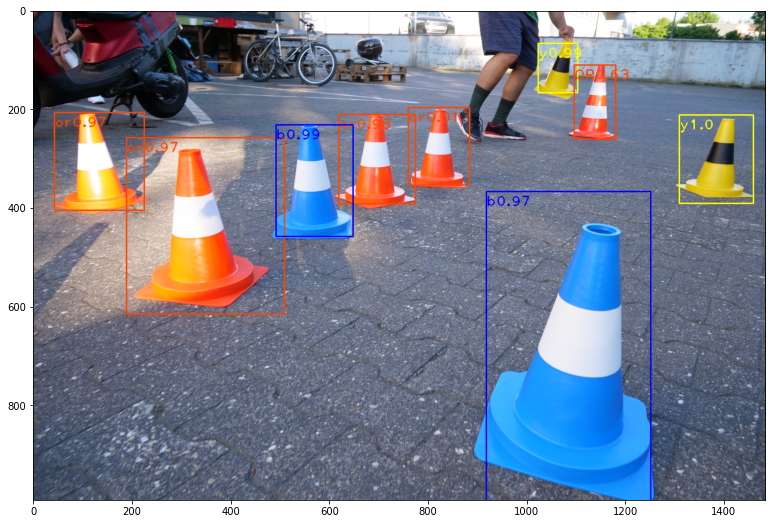

In [ ]:
import matplotlib.pyplot as plt
#print image transforming BGR-->GBR
plt.figure(figsize = (16,9))
imgplot = plt.imshow(img[...,::-1])


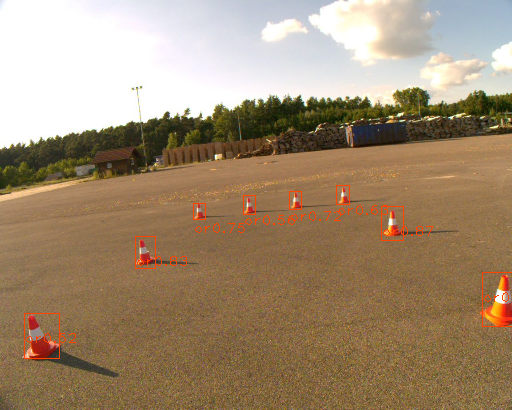

-1

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
